<a href="https://colab.research.google.com/github/nabanaa/FaceReco/blob/main/analiza_face_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import seaborn as sns
drive.mount("/content/drive", force_remount=True)
from google.colab import output
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
import sklearn.metrics as sk
import matplotlib.pyplot as plt

creds, _ = default()


arkusz = '11sl6PCw_9n_WPeu1wKH5nSjmRbmelGyiHj8IYShOZdM'

gc = gspread.authorize(creds)
worksheet = gc.open_by_key(arkusz).sheet1
rows = worksheet.get_all_values()

Mounted at /content/drive


In [ ]:
df = pd.DataFrame(rows)
df.columns = df.iloc[0]
df = df[1:]
print('dane wsadowe')
display(df)
df['Poprawne'] = df['GT'] == df['Rev']

dane wsadowe


,Path,GT,Rev,User
1,Sad/7f3e8fd8cd606b167521ab9d5b5c8eb8064f9d37b2...,Sad,Sad,None
2,Surprise/cropped_emotions.262508~12fffff.png,Surprise,Surprise,BP
3,Happy/0b7e33ef735309aaa7d44b0342b74fa74e2747a3...,Happy,Happy,BP
4,Sad/3ea587639f34f6f78a9f9463d142ada9f386e24a4f...,Sad,Sad,BP
5,Neutral/1a757f8bcc01690a04b92027bf68bffa570638...,Neutral,Neutral,JS
...,...,...,...,...
585,Happy/cropped_emotions.418286.png,Happy,Happy,JS
586,Sad/1ff8eb6abcb6fbacfbc35d2f7ea04774b850449b22...,Sad,Sad,JS
587,Neutral/0a750d4ab41ab304c23f8652ade90e59a24ea5...,Neutral,Neutral,PS
588,Surprise/cropped_emotions.414927~12fffff.png,Surprise,Surprise,JS


In [ ]:
# print('Macierz pomyłek')
# macierz = df[df['GT']!=df['Rev']].groupby(['GT', 'Rev'], as_index=False).count().sort_values(['Path'], ascending=False)
# macierz.drop(labels=['User', 'Poprawne'], axis=1, inplace=True)
# macierz.rename(columns={"Path": "Count", "GT": "Prawidłowa", "Rev":"Udzielona"}, inplace=True)
# macierz

In [ ]:
len(df[(df["GT"]=='Sad') & (df['Rev']=='Neutral')])

22

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [ ]:
l = df['GT'].unique()

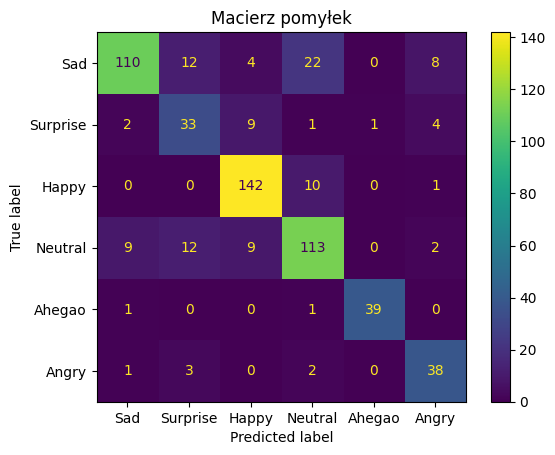

In [ ]:
m = sk.confusion_matrix(df['GT'], df['Rev'], labels = l)
disp = sk.ConfusionMatrixDisplay(m, display_labels = l)
disp.plot()
plt.title('Macierz pomyłek')
plt.show()

In [ ]:
help = df.groupby('User', as_index=False).count()[['User', 'Path']]

In [ ]:
skutecznosc = df[df['Poprawne']==True][['User', 'Path']].groupby(['User'], as_index=False).count()
skutecznosc.rename(columns={"Path": "Poprawnych odpowiedzi"}, inplace=True)
#skutecznosc['% poprawnych'] = skutecznosc['Count']/help[help['User']==skutecznosc['User']]['Path']
skutecznosc = skutecznosc.merge(help, how='inner', on='User')
skutecznosc['% poprawnych'] = round(skutecznosc['Poprawnych odpowiedzi']/skutecznosc['Path']*100, 2)
skutecznosc.sort_values('Poprawnych odpowiedzi', ascending=False, inplace=True)
skutecznosc.drop(labels='Path', axis=1, inplace=True)

In [ ]:
print('skuteczność poszczególnych użytkowników')
skutecznosc

skuteczność poszczególnych użytkowników


,User,Poprawnych odpowiedzi,% poprawnych
2,JS,282,78.99
1,BP,126,90.00
5,adam pospieszny,43,72.88
4,PS,19,79.17
0,,4,50.00
3,None,1,100.00


fatal: not a git repository (or any of the parent directories): .git
/bin/bash: line 1: USERNAME: No such file or directory
